In [1]:
from finvizfinance.quote import finvizfinance
ticker = 'NFLX'
stock = finvizfinance(ticker)

In [ ]:
news_df = stock.ticker_news()
news_df['Tickers'] = ticker
news_df

In [ ]:
outer_ratings_df = stock.ticker_outer_ratings()
outer_ratings_df

In [ ]:
import yfinance as yf
ticker= get_data("amzn", start_date="12/04/2009", end_date="12/04/2019", index_as_date = True, interval="1wk")
ticker.info

In [ ]:
import yahoo_fin.stock_info as si
dow_list = si.tickers_nasdaq()
print("Tickers in NasdaQ:", len(dow_list))
dow_list

In [ ]:
import yahoo_fin.stock_info as si
si.get_analysts_info('nflx')

In [ ]:
from yahoo_fin.stock_info import *
import yfinance as yf
nasdaq = tickers_nasdaq()
nasdaq_list = nasdaq[:10]
for i in nasdaq_list:
    ticker = yf.download(i,interval='1m',period='1d',progress=False)
    ticker['Ticker'] = i
    print(ticker)

In [ ]:
from yahoo_fin.stock_info import *
import yfinance as yf
ticker = "ACE.BK"
data = yf.Ticker(ticker)
data.news

In [ ]:
from bs4 import BeautifulSoup
import requests


url = 'https://www.nasdaq.com/articles/will-roku-stock-break-hearts-this-week'
headers = {
    'User-Agent': 'Chrome/58.0.3029.110'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'lxml')
data = soup.find('h1', class_='jupiter22-c-hero-article-title')

if data:
    print(data.text)
else:
    print('Could not find the data')

In [9]:
import unittest
from unittest.mock import patch,MagicMock
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf
from pandas.testing import assert_frame_equal

def save_data_news(data):
    # connect to the database
    conn = sqlite3.connect('stock.sqlite')
    # save the data to the database
    data.to_sql('stock_news',con=conn,if_exists='append',index=False)
    # close the connection
    conn.close()
df2 = pd.DataFrame()
df1 = pd.DataFrame({'Datetime': ['2023-02-19'], 'Title':['ทอท.'], 'Link':['Test'], 'Body':['Test'], 'Ticker':['AOT']})
df2 = pd.concat([df2,df1],ignore_index=True)
save_data_news(df2)


Spatial

In [1]:
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf

content_news = []
conn = sqlite3.connect("stock.sqlite")
cur = conn.cursor()
query = "SELECT Ticker FROM stock_info"
r_df = pd.read_sql(query, conn)
list_db = r_df['Ticker'].values.tolist()
df2 = pd.DataFrame()

for i in list_db:
    query2 = "SELECT ticker,body FROM stock_news WHERE `Ticker` = '%s'" % i
    news = pd.read_sql(query2, conn)
    if not(news.empty):
        df2 = pd.concat([df2,news],ignore_index=True)

In [ ]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [3]:
import nltk
import spacy
import locationtagger
from geopy.geocoders import Nominatim

# initializing sample text
sample_text = "India has very rich and vivid culture\
       widely spread from Kerala to Nagaland to Haryana to Maharashtra. " \
       "Delhi being capital with Mumbai financial capital.\
       Can be said better than some western cities such as " \
       " Munich, London etc. Pakistan and Bangladesh share its borders"

def getcity_to_latlong(text):
    # extracting entities.
    place_entity = locationtagger.find_locations(text = text)

    # calling the Nominatim tool
    loc = Nominatim(user_agent="GetLoc")
    address = pd.DataFrame()
    
    for i in place_entity.cities:
        getLoc = loc.geocode(i)
        ones = pd.DataFrame({'lat':[getLoc.latitude],'long':[getLoc.longitude]})
        # getting all cities
        address = pd.concat([address,ones],ignore_index=True)
    return address

getcity_to_latlong(sample_text)

,lat,long
0,19.078545,72.878176
1,28.651718,77.221939
2,51.507336,-0.127650
3,48.137108,11.575382
4,29.000000,76.000000


In [4]:
allplace = pd.DataFrame()
count = 0
for i in df2['Body']:
    data = getcity_to_latlong(i)
    if count < 2000 :
        allplace = pd.concat([allplace,data],ignore_index=True)
    else:
        break
    count += 1
allplace

,lat,long
0,52.131802,-106.660767
1,41.990376,-71.523673
2,38.209249,-83.071005
3,38.895037,-77.036543
4,41.040931,-73.714575
...,...,...
1014,33.425512,-111.940016
1015,41.990376,-71.523673
1016,36.616979,-99.747343
1017,52.200158,0.124222


<AxesSubplot: >

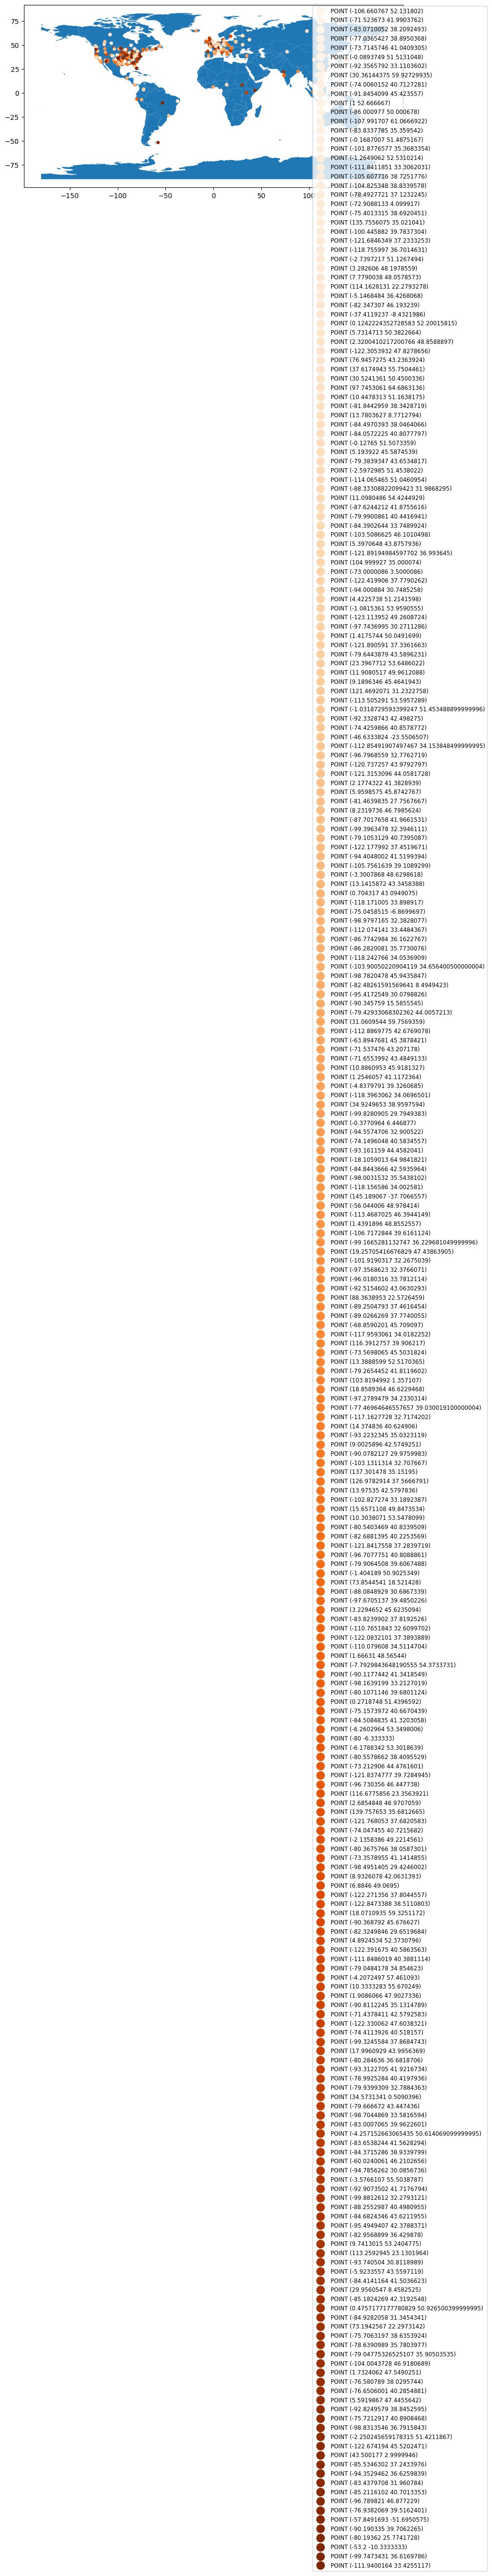

In [24]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

df = allplace

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), column='geometry',marker='o', cmap='Oranges', markersize=15, legend=True,legend_kwds={'loc':'upper right', 
                        'bbox_to_anchor':(1.23, 1.01), 
                        'fmt':'{:.3f}',
                        'markerscale':1.26, 
                        'title_fontsize':'medium', 
                        'fontsize':'small'})

In [6]:
gdf

,lat,long,geometry
0,52.131802,-106.660767,POINT (-106.66077 52.13180)
1,41.990376,-71.523673,POINT (-71.52367 41.99038)
2,38.209249,-83.071005,POINT (-83.07101 38.20925)
3,38.895037,-77.036543,POINT (-77.03654 38.89504)
4,41.040931,-73.714575,POINT (-73.71457 41.04093)
...,...,...,...
1014,33.425512,-111.940016,POINT (-111.94002 33.42551)
1015,41.990376,-71.523673,POINT (-71.52367 41.99038)
1016,36.616979,-99.747343,POINT (-99.74734 36.61698)
1017,52.200158,0.124222,POINT (0.12422 52.20016)


In [13]:
data = pd.read_csv('worldcities.csv')
place = []
for i in data['city']:
    for j in df2['Body']:
        word = j.split(' ')
        for w in word:
            w = w.lower()
            i = i.lower()
            if w == i:
                place.append(w)